# Delivery Time : Sorting Time

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings('ignore')

In [ ]:
upload =files.upload()

Saving delivery_time.csv to delivery_time (11).csv


In [ ]:
data=pd.read_csv('delivery_time.csv')
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


##**EDA And DATA VISUALIZATIONS**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


<Axes: xlabel='Delivery Time', ylabel='Density'>

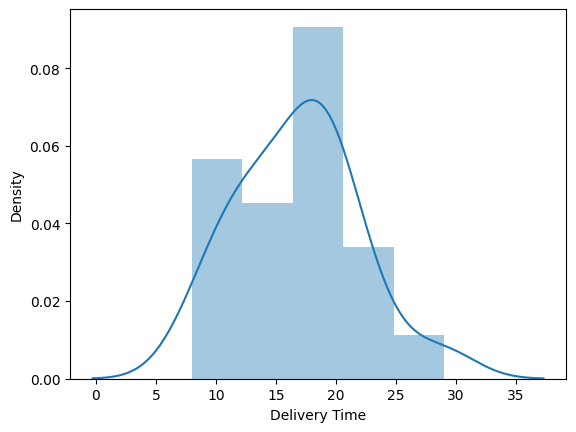

In [ ]:
sns.distplot(data['Delivery Time'])

<Axes: xlabel='Sorting Time', ylabel='Density'>

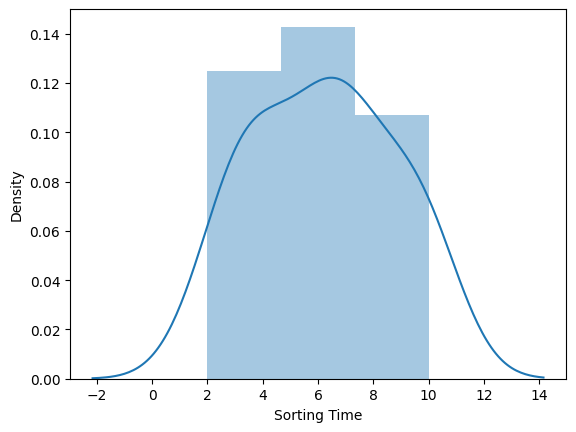

In [ ]:
sns.distplot(data['Sorting Time'])

##**DATA CORRELATION ANALYSIS**

In [ ]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<Axes: xlabel='Sorting Time', ylabel='Delivery Time'>

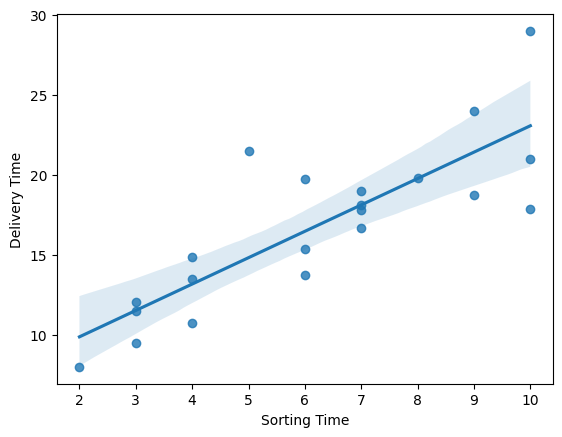

In [ ]:
sns.regplot(x=data['Sorting Time'],y=data['Delivery Time'])

##**MODEL BUILDING**

In [ ]:
data1=pd.read_csv('delivery_time.csv')

In [ ]:
x=data1['Delivery Time']
y=data1['Sorting Time']

In [ ]:
model=smf.ols("x~y",data=data1).fit()

##**MODEL TESTING**

In [ ]:
# Finding Coefficient parameters
model.params

Intercept    6.582734
y            1.649020
dtype: float64

In [ ]:
# Finding tvalues and pvalues
model.tvalues , model.pvalues

(Intercept    3.823349
 y            6.387447
 dtype: float64,
 Intercept    0.001147
 y            0.000004
 dtype: float64)

In [ ]:
# Finding Rsquared Values
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

##**MODEL PREDECTION**

In [ ]:
data1['prediction_values']=model.fittedvalues

In [ ]:
data1['Error_values']=model.resid

In [ ]:
data1.head()

,Delivery Time,Sorting Time,prediction_values,Error_values
0,21.00,10,23.072933,-2.072933
1,13.50,4,13.178814,0.321186
2,19.75,6,16.476853,3.273147
3,24.00,9,21.423913,2.576087
4,29.00,10,23.072933,5.927067


##**MODEL PREDICTION USING LOG TRANSFORMATION**

In [ ]:
data2=pd.read_csv('delivery_time.csv')

In [ ]:
data2['DeliveryTime_log']=np.log(data2['Delivery Time'])
data2.head()

,Delivery Time,Sorting Time,DeliveryTime_log
0,21.00,10,3.044522
1,13.50,4,2.602690
2,19.75,6,2.983153
3,24.00,9,3.178054
4,29.00,10,3.367296


<Axes: xlabel='Sorting Time', ylabel='Density'>

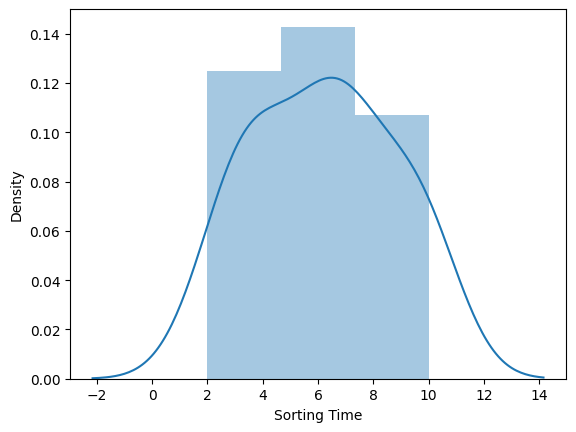

In [ ]:
sns.distplot(data2['Sorting Time'])

<Axes: xlabel='DeliveryTime_log', ylabel='Density'>

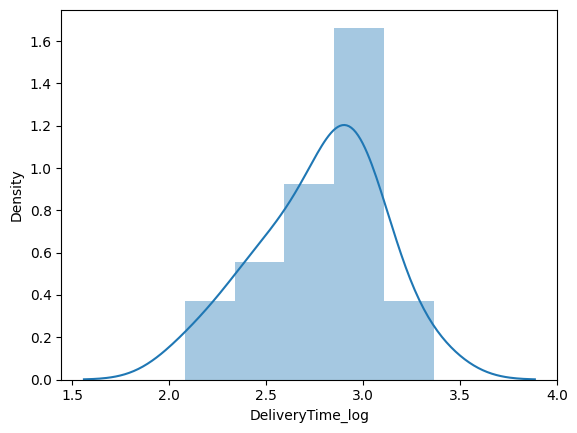

In [ ]:
sns.distplot(data2['DeliveryTime_log'])

In [ ]:
x=data2['Sorting Time']
y=data2['DeliveryTime_log']

In [ ]:
model=smf.ols('y~x',data=data2).fit()

<Axes: xlabel='Sorting Time', ylabel='DeliveryTime_log'>

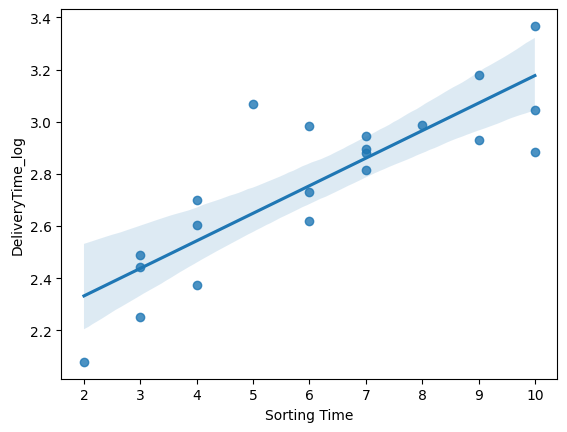

In [ ]:
sns.regplot(x=x,y=y,data=data2)

In [ ]:
model.params

Intercept    2.121372
x            0.105552
dtype: float64

In [ ]:
data2['Predicted_values']=model.fittedvalues
data2['Error_values']=model.resid
data2.head()

,Delivery Time,Sorting Time,DeliveryTime_log,Predicted_values,Error_values
0,21.00,10,3.044522,3.176888,-0.132365
1,13.50,4,2.602690,2.543578,0.059111
2,19.75,6,2.983153,2.754681,0.228472
3,24.00,9,3.178054,3.071336,0.106718
4,29.00,10,3.367296,3.176888,0.190408


##**MODEL PREDICTION USING SQRT TRANSFROM**

In [ ]:
data3=pd.read_csv('delivery_time.csv')

In [ ]:
data3['DeliveryTime_Sqrt']=np.sqrt(data3['Delivery Time'])

<Axes: xlabel='DeliveryTime_Sqrt', ylabel='Density'>

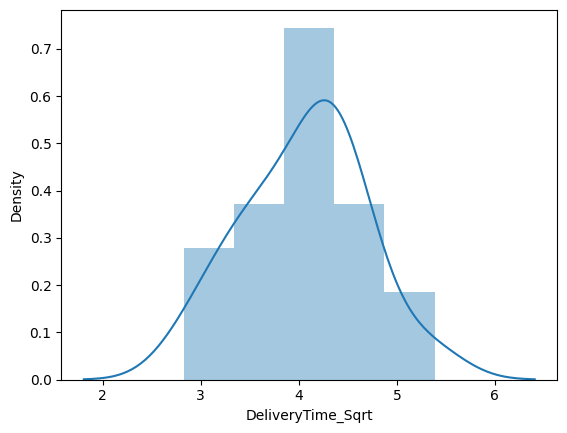

In [ ]:
sns.distplot(data3['DeliveryTime_Sqrt'])

<Axes: xlabel='Sorting Time', ylabel='Density'>

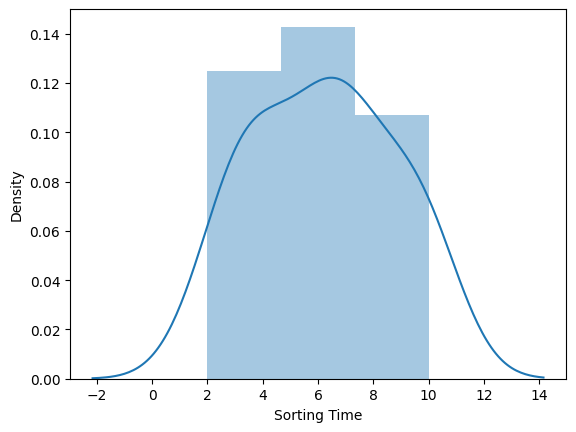

In [ ]:
sns.distplot(data3['Sorting Time'])

In [ ]:
x=data3['Sorting Time']
y=data3['DeliveryTime_Sqrt']

In [ ]:
model=smf.ols('y~x',data=data3).fit()

<Axes: xlabel='Sorting Time', ylabel='DeliveryTime_Sqrt'>

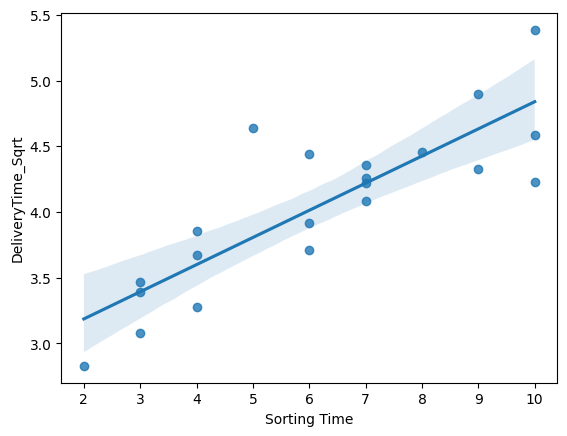

In [ ]:
sns.regplot(x=x,y=y,data=data3)

In [ ]:
model.params

Intercept    2.772731
x            0.206632
dtype: float64

In [ ]:
data3['Predicted_values']=model.fittedvalues
data3['Error_values']=model.resid
data3.head()

,Delivery Time,Sorting Time,DeliveryTime_Sqrt,Predicted_values,Error_values
0,21.00,10,4.582576,4.839049,-0.256474
1,13.50,4,3.674235,3.599258,0.074976
2,19.75,6,4.444097,4.012522,0.431575
3,24.00,9,4.898979,4.632417,0.266562
4,29.00,10,5.385165,4.839049,0.546116
